In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import FeatureAgglomeration

In [180]:
CAPOLUOGHI = ('Aosta', 'Genova', 'Trento', 'Venezia', 'Trieste', 'Firenze', 'Perugia', 'Torino', "L'Aquila", 'Bari', 'Bolzano',
              'Ancona', 'Roma', 'Bologna', 'Napoli', 'Campobasso', 'Potenza', 'Catanzaro', 'Palermo', 'Cagliari', 'Milano')

In [181]:
punteggi = pd.read_csv("punteggi.csv", index_col=0)
indicatori = pd.read_csv("indicatori.csv", index_col=0)
popolazione = pd.read_csv("aggregazioni_popolazione.csv", index_col=0)
province = pd.read_csv("province.csv", index_col=3)
province = popolazione.join(province)
province['CAPOLUOGO'] = province.index.isin(CAPOLUOGHI)

In [182]:
print(f'{punteggi.shape = }')
display(punteggi.head(3))
print(f'{100*"-"}\n{indicatori.shape = }')
display(indicatori.head(3))
print(f'{100*"-"}\n{province.shape = }')
display(province.head(3))

punteggi.shape = (107, 90)


,Amministratori comunali con meno di 40 anni,Anni di studio,Aree protette,Arrivi turistici,Assorbimento del settore residenziale,Cessazioni,Comuni con servizi per le famiglie interamente online,Comuni: capacità di riscossione,Copertura della rete fissa di accesso ultra veloce a internet,Danneggiamenti,...,Startup innovative,Tasso di disoccupazione giovanile,Tasso di infortuni sul lavoro mortali e con inabilità permanente,Tasso di mancata partecipazione al lavoro,Tasso di motorizzazione,Tasso di occupazione,Trend del pil pro capite,Truffe e frodi informatiche,Uscita precoce dal sistema di istruzione e formazione,Valore aggiunto per abitante
PROVINCIA,,,,,,,,,,,,,,,,,,,,,
Agrigento,38.6,10.54,8.9,3.067518,75.0,3.959703,27.0,69.8,36.2,303.1,...,1.96,37.004910,13.0,29.8,79.0,50.7,4.347826,333.3,33.184080,21.6
Alessandria,18.8,10.93,11.1,-1.501014,74.9,5.302991,31.6,73.8,49.0,513.0,...,2.56,21.657233,11.7,7.1,66.0,73.9,2.564103,478.3,27.083689,36.0
Ancona,22.1,11.60,11.9,9.409472,67.4,5.394640,48.9,76.1,64.6,308.0,...,7.86,30.879327,16.7,9.3,64.0,71.5,2.506964,446.0,20.825383,36.8


----------------------------------------------------------------------------------------------------
indicatori.shape = (90, 3)


,UNITA_MISURA,ANNO_RIFERIMENTO,FONTE
INDICATORE,,,
Valore aggiunto per abitante,Migliaia di euro a valori correnti,Stima sul 2025,Prometeia
Trend del pil pro capite,Var % annua,Stima 2025 / 2024,elab. su dati Prometeia
Depositi bancari delle famiglie consumatrici,In migliaia euro pro capite,Al 31 luglio 2025,Banca d'italia


----------------------------------------------------------------------------------------------------
province.shape = (107, 8)


,REGIONE,MACROREGIONE,MEGAREGIONE,POPOLAZIONE,NOME_ISTAT,COD_NUTS,COD_ISTAT,CAPOLUOGO
PROVINCIA,,,,,,,,
Milano,Lombardia,Nord-ovest,Nord,3247623,Milano,ITC4C,15,True
Bolzano,Trentino Alto Adige,Nord-est,Nord,539386,Bolzano/Bozen,ITH10,21,True
Bologna,Emilia-Romagna,Nord-est,Nord,1020865,Bologna,ITH55,37,True


# Plotting

In [151]:
plt.style.use('ggplot')

In [152]:
scaler = StandardScaler()

In [153]:
punteggi_scaled = scaler.fit_transform(punteggi)

In [162]:
punteggi_scaled.shape

(90, 107)

In [155]:
df_scaled = pd.DataFrame(punteggi_scaled, index=punteggi.index, columns=punteggi.columns)

In [156]:
df_correlation = df_scaled.corr()

In [173]:
agglo = FeatureAgglomeration(n_clusters=12)

In [174]:
df_reduced = agglo.fit_transform(df_scaled)

In [175]:
labels = agglo.labels_

In [176]:
# Mappa feature -> cluster
assign = pd.DataFrame({"feature": df_scaled.columns, "cluster": labels}).sort_values("cluster")

In [177]:
indicatori_ordinati = list(assign['feature'])

In [178]:
df_correlation = df_correlation.loc[indicatori_ordinati, indicatori_ordinati]

<Axes: xlabel='PROVINCIA', ylabel='PROVINCIA'>

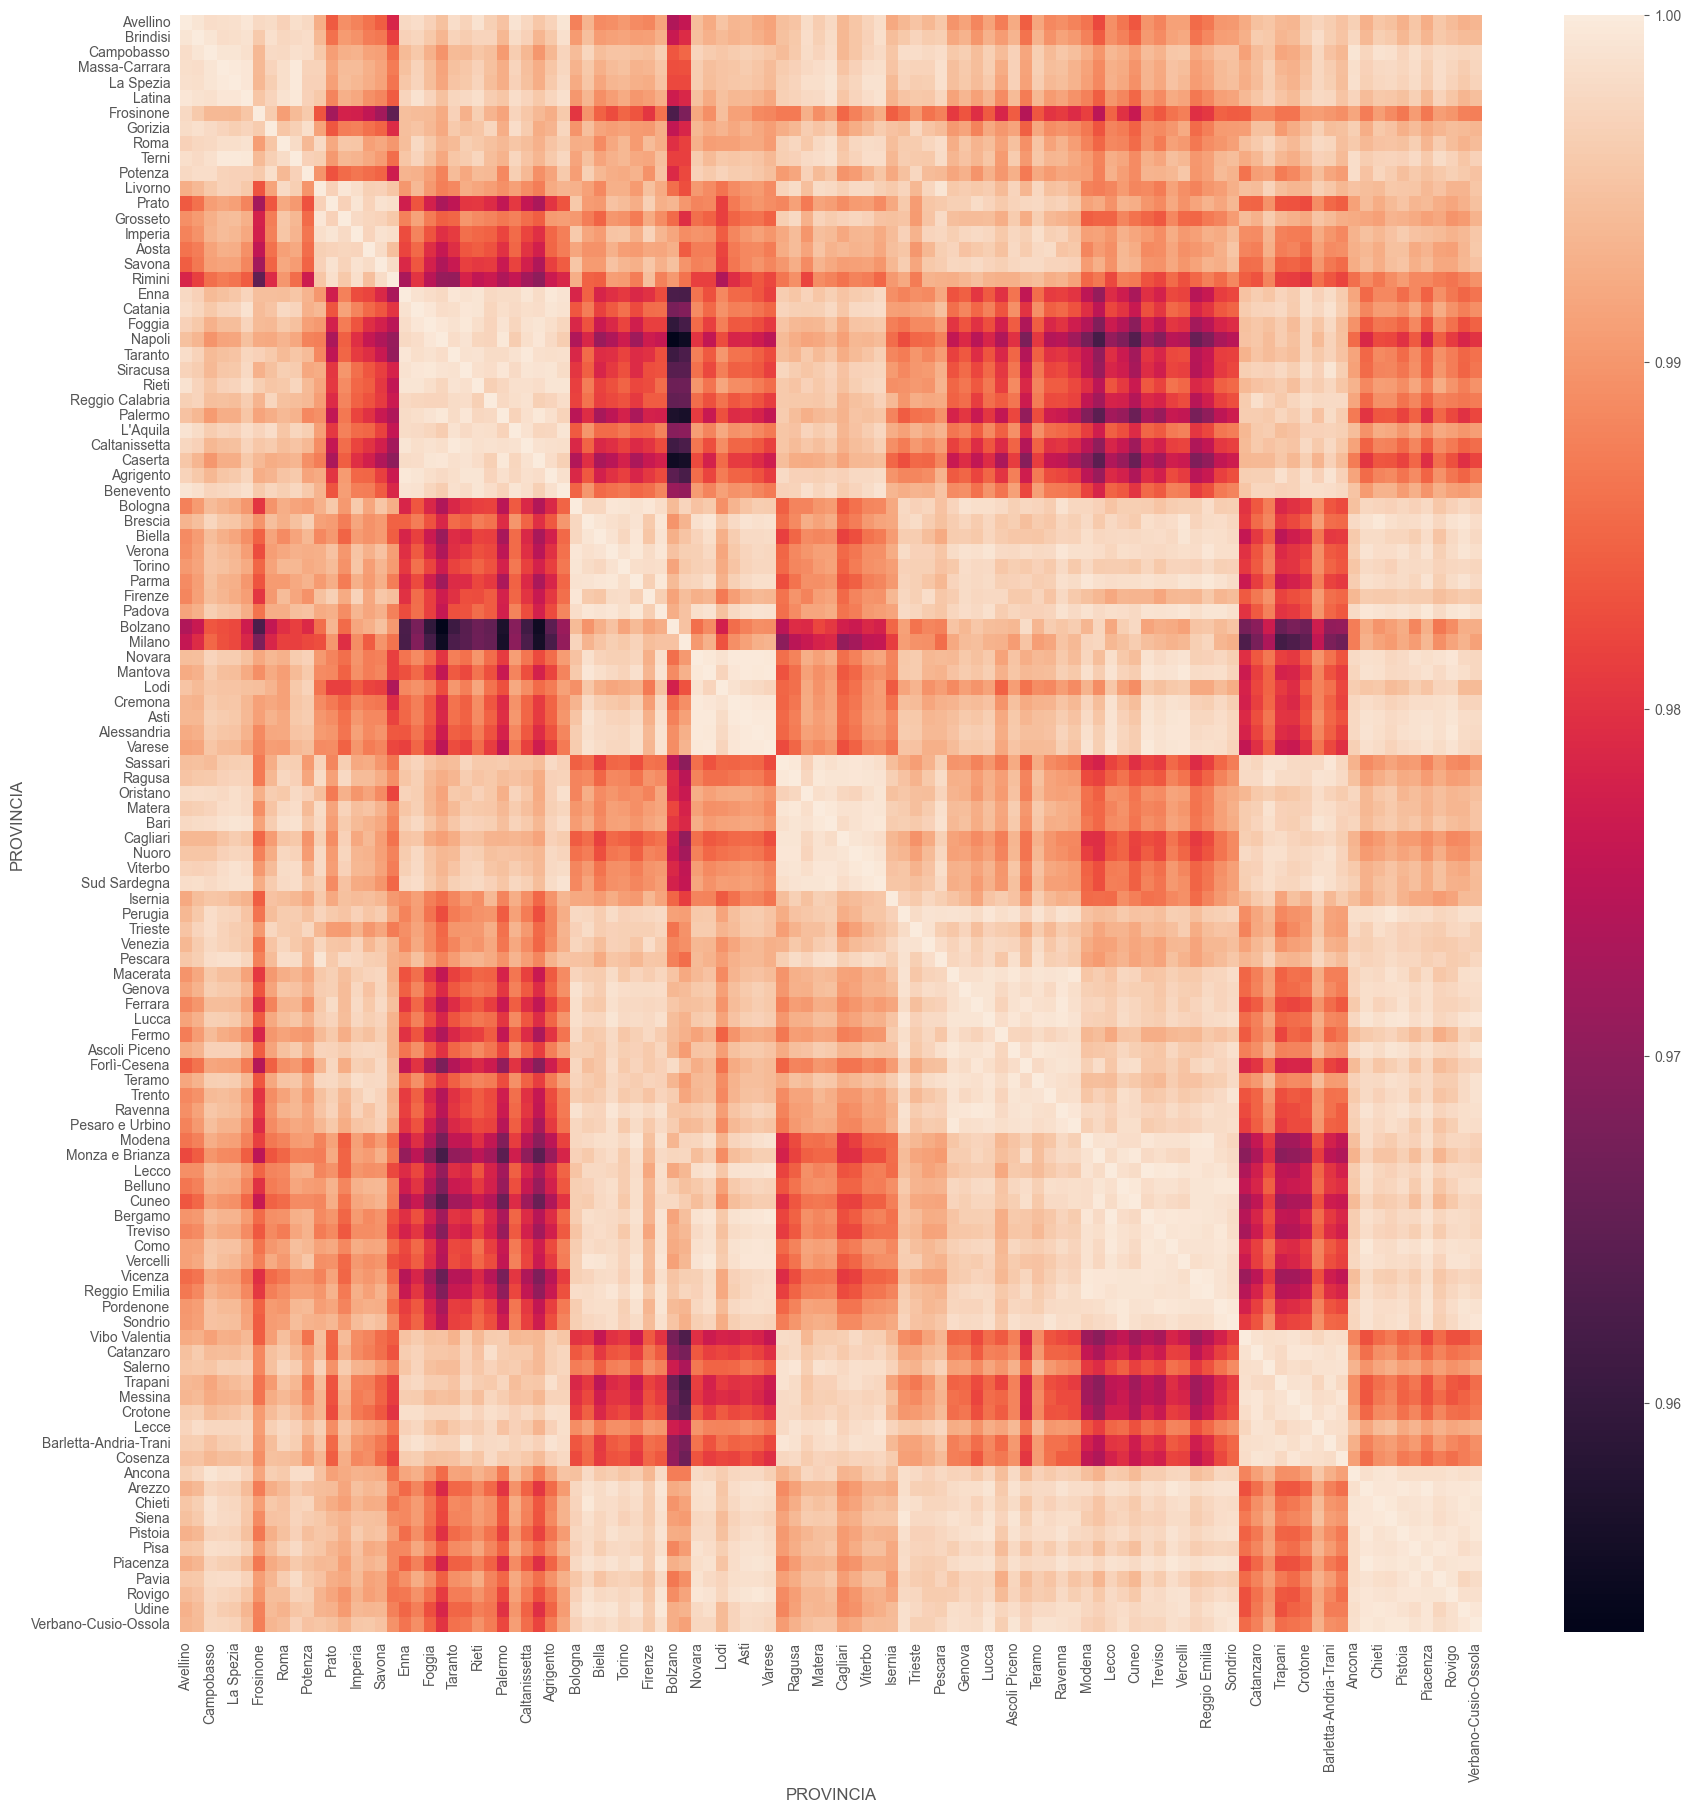

In [179]:
fig, ax = plt.subplots(1, 1, figsize=(21, 21))

sns.heatmap(df_correlation, ax=ax)

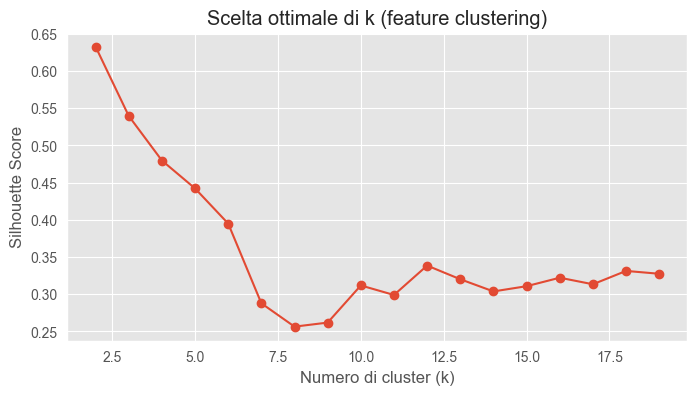

In [172]:
from sklearn.metrics import pairwise_distances, silhouette_score

from sklearn.cluster import AgglomerativeClustering


# df: DataFrame con 90 feature numeriche
X = StandardScaler().fit_transform(punteggi.values)
D = pairwise_distances(X.T, metric='correlation')  # distanza tra feature

sil_scores = []
K_range = range(2, 20)  # prova da 2 a 10 cluster

for k in K_range:
    model = AgglomerativeClustering(n_clusters=k, linkage='average', metric='precomputed')
    labels = model.fit_predict(D)
    score = silhouette_score(D, labels, metric='precomputed')
    sil_scores.append(score)

# Plot silhouette vs k
plt.figure(figsize=(8,4))
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Numero di cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Scelta ottimale di k (feature clustering)")
plt.grid(True)
plt.show()

best_k = K_range[np.argmax(sil_scores)]

# PCA

In [183]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# df: DataFrame (n_samples x n_features), solo numeriche
df = punteggi
# 1) Standardizzazione
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.values)  # shape: (n_samples, n_features)

# 2) PCA 2 componenti
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)         # shape: (n_samples, 2)

# 3) Varianza spiegata
explained = pca.explained_variance_ratio_
print(f"Varianza spiegata: PC1={explained[0]:.3f}, PC2={explained[1]:.3f} (totale={explained.sum():.3f})")

Varianza spiegata: PC1=0.323, PC2=0.101 (totale=0.424)


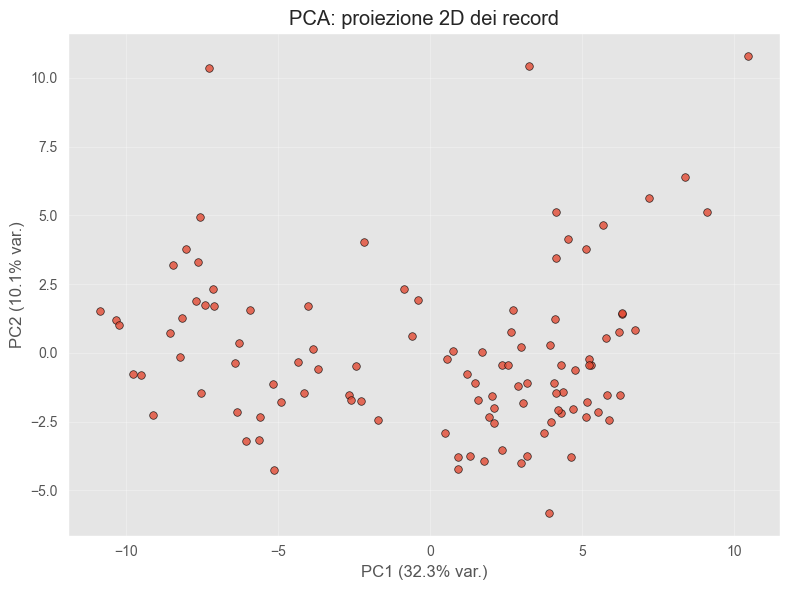

In [184]:
# 4) Plot 2D
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=30, alpha=0.8, edgecolor='k')
plt.xlabel(f"PC1 ({explained[0]*100:.1f}% var.)")
plt.ylabel(f"PC2 ({explained[1]*100:.1f}% var.)")
plt.title("PCA: proiezione 2D dei record")
plt.grid(True, alpha=0.3)
plt.tight_layout()
